Countermeasure packages
--------------------------------

This notebook contains the analyses performed to identify differences and similarities in the packages of countermeasures used to combat the spread of covid-19 by the different national governments:

* [Exploratory](#Exploratory-analysis): general overview of countermeasures used.  
* [Co-occurrences](#Countermeasures-cooccurrences): overview of the co-occurrences of countermeasures on a daily basis.
* [Graph analysis](#Graph-of-containment-countermeasures): linkages between the countermeasures used.
* [Cluster analysis](#Cluster-analyses): identify clusters of countermeasures.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 50

#### John Hopkins containment measures database

The data is made available as part of the John Hopkins [Containment Measures Database](http://epidemicforecasting.org/containment). See the website in the link for a description of the data sources.

In [3]:
containment_df = pd.read_csv("data/countermeasures_db_johnshopkins_2020_03_30.csv")

### Exploratory analysis

In [4]:
containment_df.columns

Index(['Unnamed: 0', 'Symptomatic isolation - targeted',
       'Symptomatic isolation - blanket', 'Asymptomatic isolation - targeted',
       'Asymptomatic isolation - blanket', 'Domestic travel restriction',
       'International travel restriction', 'Testing', 'Contact tracing',
       'Mask wearing', 'Hand washing', 'Gatherings banned',
       'Healthcare specialisation', 'Public education and incentives',
       'Assisting people to stay home', 'Public cleaning',
       'Miscellaneous hygiene measures', 'Public interaction reduction',
       'Nonessential business suspension', 'School closure',
       'Activity cancellation', 'Resumption', 'Diagnostic criteria loosened',
       'Diagnostic criteria tightened', 'Testing criteria', 'Date', 'Country',
       'Confirmed Cases', 'Deaths'],
      dtype='object')

In [5]:
print(containment_df["Country"].unique())

['Austria' 'Germany' 'United Kingdom' 'Vietnam' 'South Korea' 'Singapore'
 'Israel' 'Japan' 'Sweden' 'San Marino' 'Slovenia' 'Canada' 'Taiwan'
 'Macau' 'Hong Kong' 'China' 'Thailand' 'Italy' 'Czechia' 'Australia'
 'Trinidad and Tobago' 'Qatar' 'New Zealand' 'Colombia' 'Romania' 'France'
 'Portugal' 'Spain' 'Belgium' 'Luxembourg' 'Albania' 'Andorra'
 'Azerbaijan' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Denmark'
 'Estonia' 'Cyprus' 'Croatia' 'Finland' 'Georgia' 'Hungary' 'Latvia'
 'Lithuania' 'Greece' 'Moldova' 'Malta' 'Monaco' 'Netherlands' 'Iceland'
 'Ireland' 'Kosovo' 'Kazakhstan' 'Poland' 'Turkey' 'Ukraine' 'Slovakia'
 'Serbia' 'Switzerland' 'Norway' 'Montenegro' 'Iran' 'Liechtenstein'
 'Russia' 'Mexico' 'Egypt' 'Malaysia' 'Nepal' 'Afghanistan' 'Iraq'
 'Philippines' 'Kuwait' 'South Africa' 'Armenia' 'Pakistan' 'Brazil'
 'Costa Rica' 'Panama' 'India' 'Bahrain' 'United Arab Emirates'
 'Kyrgyzstan' 'Indonesia' 'Namibia' 'Uganda']


In [6]:
other_cm_cols = ['Unnamed: 0', 'Resumption', 'Diagnostic criteria tightened', 'Diagnostic criteria loosened',
                 'Testing criteria', 'Date', 'Country', 'Confirmed Cases', 'Deaths']

In [7]:
countermeasures = list(filter(lambda m: m not in other_cm_cols, containment_df.columns))

In [8]:
cm_df = containment_df[countermeasures + ['Date', 'Country']].fillna(0)

In [9]:
cm_df[countermeasures] = cm_df[countermeasures].mask(cm_df[countermeasures] > 0, 1)

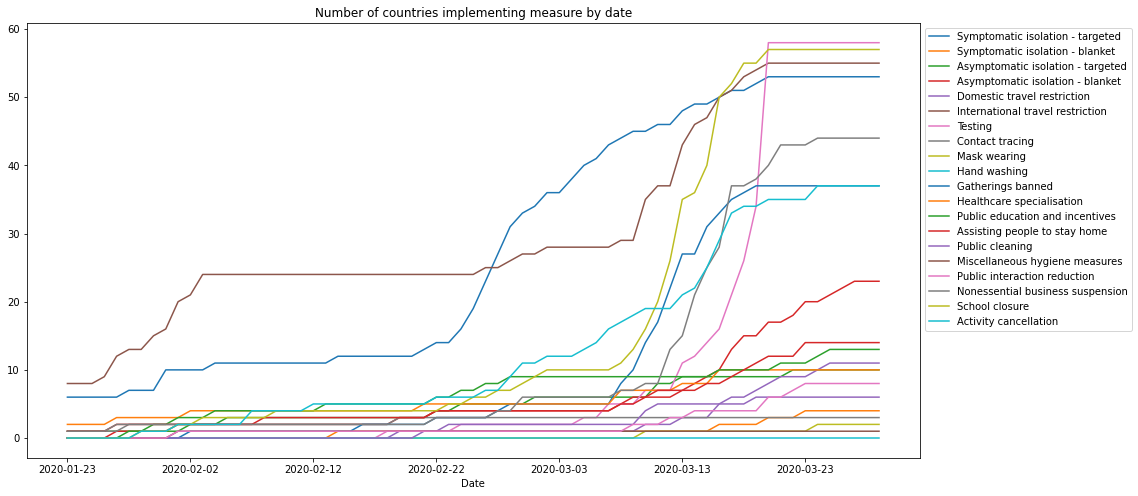

In [10]:
cm_df.groupby("Date").sum().plot(figsize=(16,8), title="Number of countries implementing measure by date")\
.legend(bbox_to_anchor=(1,1))

#### Countermeasure dataset

In [11]:
df = containment_df[countermeasures + ["Date", "Country", "Confirmed Cases", "Deaths"]].fillna(0)

In [12]:
df.head()

,Symptomatic isolation - targeted,Symptomatic isolation - blanket,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Domestic travel restriction,International travel restriction,Testing,Contact tracing,Mask wearing,Hand washing,Gatherings banned,Healthcare specialisation,Public education and incentives,Assisting people to stay home,Public cleaning,Miscellaneous hygiene measures,Public interaction reduction,Nonessential business suspension,School closure,Activity cancellation,Date,Country,Confirmed Cases,Deaths
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,Austria,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,Germany,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,United Kingdom,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,Vietnam,2,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,South Korea,1,0


In [13]:
df[countermeasures] = df[countermeasures].mask(df[countermeasures] > 0, 1.0)

Countermeasures cooccurrences
---------------------------------------

Extract the most common countermeasure cooccurrences from the daily data.

In [14]:
count_df = df[countermeasures].groupby(level=0, axis=1).sum()

In [15]:
cooccurrence_df = count_df.T.dot(count_df)
cooccurrence_df.values[[np.arange(cooccurrence_df.shape[0])] * 2] = 0

/Users/braadbaart/pysphere/covid/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [16]:
cooccurrence_df.head(50)

,Activity cancellation,Assisting people to stay home,Asymptomatic isolation - blanket,Asymptomatic isolation - targeted,Contact tracing,Domestic travel restriction,Gatherings banned,Hand washing,Healthcare specialisation,International travel restriction,Mask wearing,Miscellaneous hygiene measures,Nonessential business suspension,Public cleaning,Public education and incentives,Public interaction reduction,School closure,Symptomatic isolation - blanket,Symptomatic isolation - targeted,Testing
Activity cancellation,0.0,291.0,297.0,244.0,125.0,129.0,416.0,0.0,275.0,709.0,26.0,58.0,508.0,119.0,329.0,126.0,666.0,55.0,720.0,322.0
Assisting people to stay home,291.0,0.0,227.0,145.0,129.0,74.0,244.0,0.0,144.0,335.0,0.0,58.0,226.0,67.0,187.0,68.0,300.0,62.0,291.0,165.0
Asymptomatic isolation - blanket,297.0,227.0,0.0,179.0,125.0,86.0,272.0,0.0,179.0,337.0,0.0,58.0,315.0,104.0,207.0,86.0,366.0,59.0,338.0,145.0
Asymptomatic isolation - targeted,244.0,145.0,179.0,0.0,119.0,51.0,150.0,0.0,165.0,306.0,6.0,57.0,162.0,48.0,182.0,92.0,226.0,45.0,342.0,149.0
Contact tracing,125.0,129.0,125.0,119.0,0.0,45.0,115.0,0.0,119.0,134.0,0.0,58.0,92.0,0.0,106.0,68.0,126.0,45.0,155.0,45.0
Domestic travel restriction,129.0,74.0,86.0,51.0,45.0,0.0,102.0,0.0,54.0,142.0,14.0,40.0,142.0,45.0,54.0,40.0,142.0,0.0,139.0,69.0
Gatherings banned,416.0,244.0,272.0,150.0,115.0,102.0,0.0,0.0,201.0,609.0,20.0,43.0,476.0,95.0,201.0,81.0,674.0,62.0,605.0,357.0
Hand washing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Healthcare specialisation,275.0,144.0,179.0,165.0,119.0,54.0,201.0,0.0,0.0,361.0,26.0,57.0,200.0,57.0,258.0,75.0,248.0,55.0,290.0,110.0
International travel restriction,709.0,335.0,337.0,306.0,134.0,142.0,609.0,0.0,361.0,0.0,26.0,56.0,588.0,117.0,415.0,128.0,932.0,76.0,1133.0,512.0


In [17]:
minimum_number_of_cooccurrences = 600

In [18]:
top_cooccurrences = []

for m in countermeasures:
    cooccurrences = cooccurrence_df.to_dict()[m]
    for cm in countermeasures:
        if int(cooccurrences[cm]) >= minimum_number_of_cooccurrences:
            top_cooccurrences.append((m, cm, cooccurrences[cm]))

In [19]:
top_cooccurrent_measures = []
processed = []

for tc in top_cooccurrences:
    if (tc[0], tc[1]) not in processed and (tc[1], tc[0]) not in processed:
        top_cooccurrent_measures.append(tc)
        processed.append((tc[0], tc[1]))

In [20]:
pd.DataFrame(sorted(top_cooccurrent_measures, key = lambda t: -t[2]), columns=["Measure", "Co-implemented", "Count"])

,Measure,Co-implemented,Count
0,Symptomatic isolation - targeted,International travel restriction,1133.0
1,International travel restriction,School closure,932.0
2,Symptomatic isolation - targeted,School closure,889.0
3,Symptomatic isolation - targeted,Activity cancellation,720.0
4,International travel restriction,Activity cancellation,709.0
5,Nonessential business suspension,School closure,703.0
6,Gatherings banned,School closure,674.0
7,School closure,Activity cancellation,666.0
8,Symptomatic isolation - targeted,Nonessential business suspension,664.0
9,International travel restriction,Gatherings banned,609.0


### Graph of containment countermeasures

In [21]:
co_G = nx.Graph()

In [22]:
for m in countermeasures:
    cooccurrences = cooccurrence_df.to_dict()[m]
    for cm in countermeasures:
        co_G.add_edge(m, cm, weight=cooccurrences[cm])

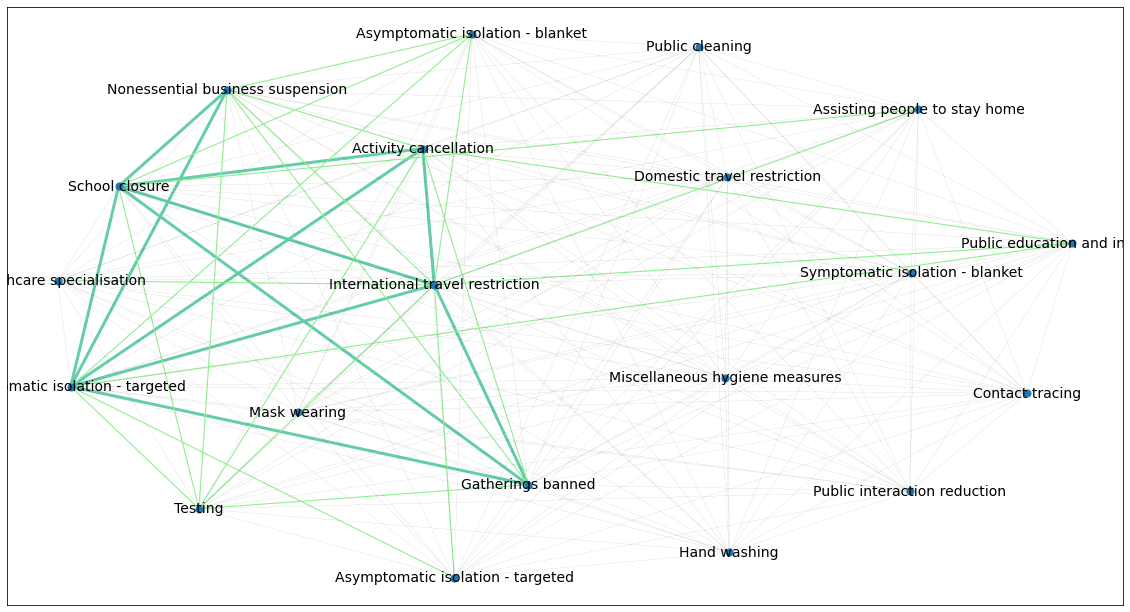

In [23]:
elarge = [(u, v) for (u, v, d) in co_G.edges(data=True) if d['weight'] >= 600.]
emid = [(u, v) for (u, v, d) in co_G.edges(data=True) if d['weight'] < 600. and d['weight'] >= 300.]
esmall = [(u, v) for (u, v, d) in co_G.edges(data=True) if d['weight'] < 300.]

plt.figure(figsize=(20,11))
pos = nx.nx_agraph.graphviz_layout(co_G, prog="neato")

nx.draw_networkx_nodes(co_G, pos, node_size=50)

nx.draw_networkx_edges(co_G, pos, edgelist=elarge, width=3.0, edge_color="mediumaquamarine")
nx.draw_networkx_edges(co_G, pos, edgelist=emid, width=1.1, edge_color="lightgreen")
nx.draw_networkx_edges(co_G, pos, edgelist=esmall, width=0.05)

nx.draw_networkx_labels(co_G, pos, font_size=14, font_family="sans-serif")

plt.show()

## Cluster analyses

#### Spectral clustering

The cluster analysis below uses scikit-learns [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) to identify clusters of countermeasures from the countermeasure co-occurrence matrix.

In [24]:
from sklearn.cluster import SpectralClustering

spectral_k = 4
sc = SpectralClustering(spectral_k, affinity='rbf', eigen_solver="arpack", eigen_tol=0.1, gamma=0.9, n_init=250,
                        random_state=42, assign_labels='discretize')

In [25]:
cooccurrence_df.index.values

array(['Activity cancellation', 'Assisting people to stay home',
       'Asymptomatic isolation - blanket',
       'Asymptomatic isolation - targeted', 'Contact tracing',
       'Domestic travel restriction', 'Gatherings banned', 'Hand washing',
       'Healthcare specialisation', 'International travel restriction',
       'Mask wearing', 'Miscellaneous hygiene measures',
       'Nonessential business suspension', 'Public cleaning',
       'Public education and incentives', 'Public interaction reduction',
       'School closure', 'Symptomatic isolation - blanket',
       'Symptomatic isolation - targeted', 'Testing'], dtype=object)

In [26]:
spectral = sc.fit_predict(cooccurrence_df)

/Users/braadbaart/pysphere/covid/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/braadbaart/pysphere/covid/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [27]:
spectral_labels = sorted(list(zip(spectral, cooccurrence_df.index.values)))

In [28]:
from itertools import groupby
from operator import itemgetter

spectral_clusters = [list(map(itemgetter(1), values)) for (k, values) in groupby(spectral_labels, itemgetter(0))]

In [29]:
sc_printout = "\n---\n".join([", ".join(cluster) for cluster in spectral_clusters])

In [30]:
print(f"\tThe following {spectral_k} clusters were identified using spectral clustering: \n\n" + sc_printout)

	The following 4 clusters were identified using spectral clustering: 

Asymptomatic isolation - targeted, Domestic travel restriction, International travel restriction, Mask wearing, Miscellaneous hygiene measures, Public cleaning, Public education and incentives, Testing
---
Assisting people to stay home, Gatherings banned, Nonessential business suspension, School closure, Symptomatic isolation - targeted
---
Activity cancellation, Asymptomatic isolation - blanket, Contact tracing, Hand washing, Healthcare specialisation
---
Public interaction reduction, Symptomatic isolation - blanket


#### Agglomorative clustering

The cluster analysis below uses scikit-learns [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) to identify clusters of countermeasures from the co-occurrence matrix.

In [31]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_k = 4
ag = AgglomerativeClustering(n_clusters=agglomerative_k, linkage="ward")

In [32]:
agglomerative = ag.fit(cooccurrence_df)

/Users/braadbaart/pysphere/covid/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [33]:
agglo_labels = sorted(list(zip(agglomerative.labels_, cooccurrence_df.index.values)))

In [34]:
from itertools import groupby
from operator import itemgetter

agglomerative_clusters = [list(map(itemgetter(1), values)) for (k, values) in groupby(agglo_labels, itemgetter(0))]

In [35]:
ag_printout = "\n---\n".join([", ".join(cluster) for cluster in agglomerative_clusters])

In [36]:
print(f"\tThe following {spectral_k} clusters were identified using agglomerative clustering: \n\n" + ag_printout)

	The following 4 clusters were identified using agglomerative clustering: 

Activity cancellation, Gatherings banned, Nonessential business suspension, School closure, Symptomatic isolation - targeted
---
Contact tracing, Domestic travel restriction, Hand washing, Mask wearing, Miscellaneous hygiene measures, Public cleaning, Public interaction reduction, Symptomatic isolation - blanket
---
Assisting people to stay home, Asymptomatic isolation - blanket, Asymptomatic isolation - targeted, Healthcare specialisation, Public education and incentives, Testing
---
International travel restriction
